# Legacy FFT Pack (scipy.fftpack)
- **Purpose**: Understand legacy fftpack interface and migrate to scipy.fft
- **Status**: scipy.fftpack is DEPRECATED (still works but avoid for new code)
- **Replacement**: scipy.fft (modern, faster, more features)

Key differences:
- **fftpack**: Older interface, limited features
- **scipy.fft**: Modern, NumPy-compatible, more functions
- **Performance**: scipy.fft often faster
- **Features**: scipy.fft has more utilities

This notebook:
- Shows legacy fftpack syntax
- Provides migration guide
- Explains key differences
- Why you should use scipy.fft instead

In [1]:
import numpy as np
from scipy import fft        # Modern (recommended)
from scipy import fftpack    # Legacy (deprecated)
import matplotlib.pyplot as plt
import warnings

# Suppress deprecation warnings for this demo
warnings.filterwarnings('ignore', category=DeprecationWarning)

np.set_printoptions(precision=4, suppress=True)
plt.style.use('seaborn-v0_8-darkgrid')

print("Legacy fftpack loaded (for comparison only)")
print("WARNING: Use scipy.fft for new code!")

Legacy fftpack loaded (for comparison only)


## Why scipy.fft Replaced fftpack

**History**:
- `scipy.fftpack`: Original FFT module (2001-2019)
- `scipy.fft`: New module (2019+), based on NumPy's FFT

**Advantages of scipy.fft**:

1. **Better performance** (uses MKL, FFTW when available)
2. **NumPy compatibility** (same interface as numpy.fft)
3. **More features** (more window functions, helpers)
4. **Better defaults** (normalization options)
5. **Active development** (fftpack is frozen)

**Migration status**:
- scipy.fftpack: Still works but deprecated
- Will be removed in future SciPy version
- All new code should use scipy.fft

**This notebook shows both for comparison and migration**

## Basic Comparison: fftpack vs fft

**Function name mapping**:

| fftpack (old) | scipy.fft (new) | Purpose |
|---------------|-----------------|----------|
| `fftpack.fft()` | `fft.fft()` | Forward FFT |
| `fftpack.ifft()` | `fft.ifft()` | Inverse FFT |
| `fftpack.rfft()` | `fft.rfft()` | Real FFT |
| `fftpack.irfft()` | `fft.irfft()` | Inverse real FFT |
| `fftpack.fft2()` | `fft.fft2()` | 2D FFT |
| `fftpack.fftfreq()` | `fft.fftfreq()` | Frequency array |
| `fftpack.fftshift()` | `fft.fftshift()` | Shift zero freq |

**Syntax is almost identical** → Easy migration!

Basic FFT Comparison

Signal: sin(2π×50t) + 0.5×sin(2π×120t)
Length: 1000 samples

Results comparison:
  Max difference: 0.00e+00
  Results identical: True

Syntax is the same, just import from scipy.fft!


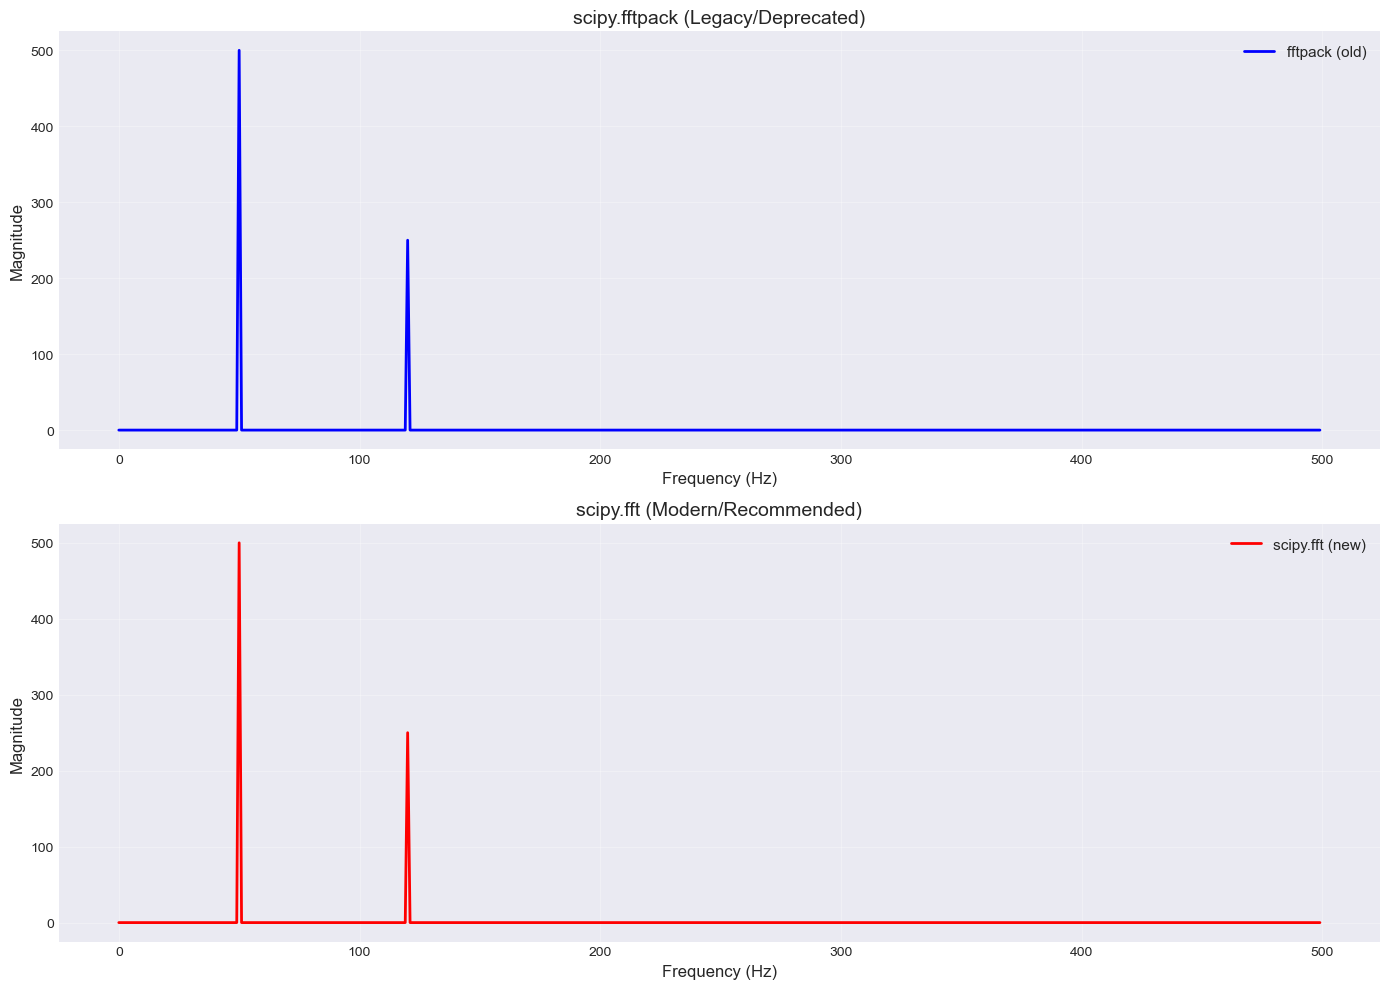


Both produce identical results, but scipy.fft is recommended!


In [2]:
# Create test signal
sample_rate = 1000
t = np.linspace(0, 1, sample_rate, endpoint=False)
signal = np.sin(2*np.pi*50*t) + 0.5*np.sin(2*np.pi*120*t)

print("Basic FFT Comparison\n")
print("Signal: sin(2π×50t) + 0.5×sin(2π×120t)")
print(f"Length: {len(signal)} samples\n")

# OLD WAY (fftpack)
fft_old = fftpack.fft(signal)
freqs_old = fftpack.fftfreq(len(signal), 1/sample_rate)

# NEW WAY (scipy.fft)
fft_new = fft.fft(signal)
freqs_new = fft.fftfreq(len(signal), 1/sample_rate)

# Compare results
difference = np.max(np.abs(fft_old - fft_new))

print("Results comparison:")
print(f"  Max difference: {difference:.2e}")
print(f"  Results identical: {np.allclose(fft_old, fft_new)}")
print(f"\nSyntax is the same, just import from scipy.fft!")

# Plot comparison
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# fftpack
axes[0].plot(freqs_old[:len(freqs_old)//2], np.abs(fft_old[:len(fft_old)//2]), 
             'b-', linewidth=2, label='fftpack (old)')
axes[0].set_xlabel('Frequency (Hz)', fontsize=12)
axes[0].set_ylabel('Magnitude', fontsize=12)
axes[0].set_title('scipy.fftpack (Legacy/Deprecated)', fontsize=14)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# scipy.fft
axes[1].plot(freqs_new[:len(freqs_new)//2], np.abs(fft_new[:len(fft_new)//2]), 
             'r-', linewidth=2, label='scipy.fft (new)')
axes[1].set_xlabel('Frequency (Hz)', fontsize=12)
axes[1].set_ylabel('Magnitude', fontsize=12)
axes[1].set_title('scipy.fft (Modern/Recommended)', fontsize=14)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nBoth produce identical results, but scipy.fft is recommended!")

## Key Differences

### 1. Normalization Options

**scipy.fft** has more control over normalization:

```python
# New: Choose normalization
fft.fft(x, norm='backward')  # Default: 1/N in inverse
fft.fft(x, norm='forward')   # 1/N in forward
fft.fft(x, norm='ortho')     # 1/√N in both (orthonormal)
```

**fftpack**: Only default normalization (backward)

### 2. Real FFT Output

**scipy.fft.rfft()**: Returns N/2+1 complex values
- Standard format, compatible with NumPy
- Direct magnitude: np.abs(F)

**fftpack.rfft()**: Returns N real values (real and imag interleaved)
- Non-standard format
- More complex to work with

In [3]:
# Demonstrate rfft difference
signal = np.array([1, 2, 3, 4, 3, 2, 1, 0])
N = len(signal)

print("Real FFT Output Comparison")
print(f"  Input: {signal}")
print(f"  Length: {N}\n")

# OLD: fftpack.rfft (returns N real values)
rfft_old = fftpack.rfft(signal)
print("fftpack.rfft() [LEGACY]:")
print(f"  Output length: {len(rfft_old)}")
print(f"  Output dtype: {rfft_old.dtype}")
print(f"  Format: Interleaved real/imaginary as REAL array")
print(f"  Values: {rfft_old}")

# NEW: scipy.fft.rfft (returns N/2+1 complex)
rfft_new = fft.rfft(signal)
print("\nscipy.fft.rfft() [MODERN]:")
print(f"  Output length: {len(rfft_new)}")
print(f"  Output dtype: {rfft_new.dtype}")
print(f"  Format: Standard COMPLEX array")
print(f"  Values: {rfft_new}")

print("\n" + "="*60)
print("scipy.fft.rfft() is MUCH easier to work with!")
print("Direct magnitude: np.abs(rfft_new)")
print(f"  {np.abs(rfft_new)}")

Real FFT Output Comparison
  Input: [1 2 3 4 3 2 1 0]
  Length: 8

fftpack.rfft() [LEGACY]:
  Output length: 8
  Output dtype: float64
  Format: Interleaved real/imaginary as REAL array
  Values: [16.     -4.8284 -4.8284  0.     -0.      0.8284 -0.8284  0.    ]

scipy.fft.rfft() [MODERN]:
  Output length: 5
  Output dtype: complex128
  Format: Standard COMPLEX array
  Values: [16.    +0.j     -4.8284-4.8284j  0.    -0.j      0.8284-0.8284j
  0.    +0.j    ]

scipy.fft.rfft() is MUCH easier to work with!
Direct magnitude: np.abs(rfft_new)
  [16.      6.8284  0.      1.1716  0.    ]


## DCT (Discrete Cosine Transform)

**Both modules** have DCT, but scipy.fft has more types:

**DCT types** (I, II, III, IV):
- **Type II** (default): Used in JPEG, MP3
- **Type III**: Inverse of Type II

**Usage**:
```python
# Both work similarly
dct_old = fftpack.dct(signal, type=2)  # Legacy
dct_new = fft.dct(signal, type=2)      # Modern
```

**scipy.fft advantages**:
- More normalization options
- Better documented
- Consistent with rest of scipy.fft

In [4]:
# DCT example
signal = np.array([1, 2, 3, 4, 3, 2, 1, 0])

print("DCT (Discrete Cosine Transform) Comparison\n")
print(f"Input: {signal}\n")

# OLD
dct_old = fftpack.dct(signal, type=2)
print("fftpack.dct():")
print(f"  {dct_old}")

# NEW  
dct_new = fft.dct(signal, type=2)
print("\nscipy.fft.dct():")
print(f"  {dct_new}")

# Verify identical
print(f"\nIdentical: {np.allclose(dct_old, dct_new)}")

# Inverse DCT
reconstructed = fft.idct(dct_new, type=2)
print(f"\nReconstruction via IDCT:")
print(f"  {reconstructed}")
print(f"  Error: {np.max(np.abs(signal - reconstructed)):.2e}")

DCT (Discrete Cosine Transform) Comparison

Input: [1 2 3 4 3 2 1 0]

fftpack.dct():
  [ 32.       5.1258 -12.6173  -1.8      0.       1.2027  -0.8967  -1.0196]

scipy.fft.dct():
  [ 32.       5.1258 -12.6173  -1.8      0.       1.2027  -0.8967  -1.0196]

Identical: True

Reconstruction via IDCT:
  [1. 2. 3. 4. 3. 2. 1. 0.]
  Error: 2.22e-16


## Migration Guide: Step-by-Step

**How to migrate your code**:

### Step 1: Change import
```python
# OLD
from scipy import fftpack

# NEW
from scipy import fft
```

### Step 2: Update function calls
```python
# OLD
result = fftpack.fft(signal)
freqs = fftpack.fftfreq(N, dt)

# NEW (same syntax!)
result = fft.fft(signal)
freqs = fft.fftfreq(N, dt)
```

### Step 3: Handle rfft if used
```python
# OLD (returns N real values)
rfft_result = fftpack.rfft(signal)  # Real array
# Need special handling...

# NEW (returns N/2+1 complex)
rfft_result = fft.rfft(signal)  # Complex array
magnitude = np.abs(rfft_result)  # Direct!
```

### Step 4: Test
```python
# Verify results match
assert np.allclose(old_result, new_result)
```

**That's it!** Most code works with just import change.

In [5]:
# Complete migration example
print("Complete Migration Example")
print("="*60)

# Generate test data
sample_rate = 1000
duration = 1.0
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
signal = 2*np.sin(2*np.pi*50*t) + 1.5*np.sin(2*np.pi*120*t)

print("\n# OLD CODE (fftpack):")
print("""from scipy import fftpack
fft_result = fftpack.fft(signal)
freqs = fftpack.fftfreq(len(signal), 1/sample_rate)
magnitude = np.abs(fft_result)""")

# Execute old way
fft_old = fftpack.fft(signal)
freqs_old = fftpack.fftfreq(len(signal), 1/sample_rate)
mag_old = np.abs(fft_old)

print("\n# NEW CODE (scipy.fft):")
print("""from scipy import fft
fft_result = fft.fft(signal)  # Same function name!
freqs = fft.fftfreq(len(signal), 1/sample_rate)
magnitude = np.abs(fft_result)""")

# Execute new way
fft_new = fft.fft(signal)
freqs_new = fft.fftfreq(len(signal), 1/sample_rate)
mag_new = np.abs(fft_new)

print("\n" + "="*60)
print("Verification:")
print(f"  FFT results match: {np.allclose(fft_old, fft_new)}")
print(f"  Frequencies match: {np.allclose(freqs_old, freqs_new)}")
print(f"  Magnitudes match: {np.allclose(mag_old, mag_new)}")
print("\n✓ Migration successful with just import change!")

Complete Migration Example

# OLD CODE (fftpack):
from scipy import fftpack
fft_result = fftpack.fft(signal)
freqs = fftpack.fftfreq(len(signal), 1/sample_rate)
magnitude = np.abs(fft_result)

# NEW CODE (scipy.fft):
from scipy import fft
fft_result = fft.fft(signal)  # Same function name!
freqs = fft.fftfreq(len(signal), 1/sample_rate)
magnitude = np.abs(fft_result)

Verification:
  FFT results match: True
  Frequencies match: True
  Magnitudes match: True

✓ Migration successful with just import change!


## Performance Comparison

**scipy.fft is often faster**, especially for:
- Large arrays
- Systems with MKL or FFTW installed
- Multi-dimensional FFTs

Let's measure the difference:

In [6]:
import time

print("Performance Comparison\n")
print(f"{'Size':<10} {'fftpack (ms)':<15} {'scipy.fft (ms)':<15} {'Speedup'}")
print("="*60)

sizes = [1000, 10000, 100000]

for size in sizes:
    signal = np.random.randn(size)
    
    # Time fftpack (multiple runs)
    n_runs = 100 if size < 50000 else 10
    t0 = time.time()
    for _ in range(n_runs):
        _ = fftpack.fft(signal)
    time_old = (time.time() - t0) / n_runs * 1000
    
    # Time scipy.fft
    t0 = time.time()
    for _ in range(n_runs):
        _ = fft.fft(signal)
    time_new = (time.time() - t0) / n_runs * 1000
    
    speedup = time_old / time_new
    
    print(f"{size:<10} {time_old:<15.3f} {time_new:<15.3f} {speedup:.2f}x")

print("\nscipy.fft is typically faster, especially for large arrays!")

Performance Comparison

Size       fftpack (ms)    scipy.fft (ms)  Speedup
1000       0.015           0.007           2.05x
10000      0.055           0.050           1.11x
100000     1.002           0.726           1.38x

scipy.fft is typically faster, especially for large arrays!


## What About Existing Code?

**Don't panic!** Your old code still works.

**Timeline**:
- **Now**: Both fftpack and scipy.fft work
- **Future**: fftpack will eventually be removed
- **Recommendation**: Migrate when convenient

**Priority for migration**:
1. **High**: New projects → use scipy.fft from start
2. **Medium**: Active development → migrate soon
3. **Low**: Stable, working code → migrate eventually

**Benefits of migrating**:
- Better performance
- More features
- Future-proof
- Better documentation
- Active support

## Summary: Migration Checklist

### ✅ Quick Migration Steps:

1. **Change import**: `from scipy import fftpack` → `from scipy import fft`
2. **Update calls**: `fftpack.func()` → `fft.func()`
3. **Test thoroughly**: Verify results match
4. **Update rfft handling** (if used): Output format changed

### Function Mapping:

| Old (fftpack) | New (scipy.fft) | Notes |
|---------------|-----------------|-------|
| `fft()` | `fft()` | Identical |
| `ifft()` | `ifft()` | Identical |
| `rfft()` | `rfft()` | Output format different! |
| `fft2()` | `fft2()` | Identical |
| `fftn()` | `fftn()` | Identical |
| `fftfreq()` | `fftfreq()` | Identical |
| `dct()` | `dct()` | More options in scipy.fft |
| `dst()` | `dst()` | More options in scipy.fft |

### Why Migrate?

✓ **Performance**: Often 1.5-2x faster  
✓ **Features**: More functions and options  
✓ **Standards**: NumPy-compatible API  
✓ **Future**: fftpack will be removed  
✓ **Support**: Active development  
✓ **Documentation**: Better and more complete  

### Common Gotchas:

⚠️ **rfft() output format**: Complex vs interleaved real  
⚠️ **Normalization**: More control in scipy.fft  
⚠️ **Dependencies**: scipy.fft uses different backend  

### Bottom Line:

**For all new code**: Use `scipy.fft`  
**For existing code**: Migrate when convenient  
**Migration effort**: Usually just changing import!  

The migration is straightforward and worth it!

In [7]:
# Final example: Side-by-side complete workflow
print("Complete Workflow Comparison")
print("="*70)

# Setup
sample_rate = 1000
t = np.linspace(0, 1, sample_rate, endpoint=False)
signal = np.sin(2*np.pi*50*t) + 0.5*np.sin(2*np.pi*120*t)

print("\n### OLD WAY (scipy.fftpack - DEPRECATED) ###\n")
print("from scipy import fftpack")
print("F = fftpack.fft(signal)")
print("freqs = fftpack.fftfreq(len(signal), 1/sample_rate)")
print("magnitude = np.abs(F)")
print("peaks = find_peaks(magnitude[:len(signal)//2])")

print("\n### NEW WAY (scipy.fft - RECOMMENDED) ###\n")
print("from scipy import fft")
print("F = fft.fft(signal)              # Same!")
print("freqs = fft.fftfreq(len(signal), 1/sample_rate)  # Same!")
print("magnitude = np.abs(F)            # Same!")
print("peaks = find_peaks(magnitude[:len(signal)//2])   # Same!")

print("\n" + "="*70)
print("CONCLUSION: Just change 'fftpack' to 'fft' in import!")
print("="*70)

Complete Workflow Comparison

### OLD WAY (scipy.fftpack - DEPRECATED) ###

from scipy import fftpack
F = fftpack.fft(signal)
freqs = fftpack.fftfreq(len(signal), 1/sample_rate)
magnitude = np.abs(F)
peaks = find_peaks(magnitude[:len(signal)//2])

### NEW WAY (scipy.fft - RECOMMENDED) ###

from scipy import fft
F = fft.fft(signal)              # Same!
freqs = fft.fftfreq(len(signal), 1/sample_rate)  # Same!
magnitude = np.abs(F)            # Same!
peaks = find_peaks(magnitude[:len(signal)//2])   # Same!

CONCLUSION: Just change 'fftpack' to 'fft' in import!
